### QUESTION 1

In [133]:
import yfinance as yf

In [134]:
tesla_data = yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

In [135]:
# Look at the keys and value pairs
tesla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [136]:
# A pandas datafram will be returned 
tesla_data = tesla.history(period = "max")

In [137]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### QUESTION 2

In [138]:
# Tesla revenue website
url = "https://stockanalysis.com/stocks/tsla/revenue/"

In [139]:
# Let's make a request to the website and scrape it using beautifulsoup 
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Since the revenue information is stored in a table formot , I am going to use pandas to extract this table 
data = requests.get(url).text
soup = BeautifulSoup(data , "html5lib")

# Extract tables from the html content parsed
tables = pd.read_html(str(soup))
# Select the first table 
df = tables[0]
df.head()

,Fiscal Year End,Revenue,Change,Growth
0,"Dec 31, 2023",96.77B,15.31B,18.80%
1,"Dec 31, 2022",81.46B,27.64B,51.35%
2,"Dec 31, 2021",53.82B,22.29B,70.67%
3,"Dec 31, 2020",31.54B,6.96B,28.31%
4,"Dec 31, 2019",24.58B,3.12B,14.52%


In [149]:
# Making a new dataframe for year and annual revenue only 
selected_columns = df[['Fiscal Year End' , 'Revenue']]
tesla_revenue = pd.DataFrame(selected_columns)

# Change column name
tesla_revenue.rename(columns = {'Fiscal Year End' : 'Year'}, inplace = True)

# Change to datetime format
tesla_revenue['Year'] = tesla_revenue['Year'].apply(pd.to_datetime)

# Convert Revenue column to numeric format
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'B': '*1e9','M': '*1e6', 'K': '*1e3'}, regex=True).map(pd.eval).astype(float)

# Printing last 5 rows
tesla_revenue.tail()

,Year,Revenue
20,2004-01-31,1.580000e+09
21,2003-02-01,1.350000e+09
22,2002-02-02,1.120000e+09
23,2001-02-03,7.567000e+08
24,1999-01-30,4.651700e+08


### QUESTION 3 (game stop)

In [142]:
gme = yf.Ticker("GME")
gme

yfinance.Ticker object <GME>

In [143]:
gme_data = gme.history(period = "max")

# resetting index because a dataframe is returned
gme_data.reset_index(inplace = True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4

In [144]:
url = "https://stockanalysis.com/stocks/gme/revenue/"

In [145]:
# obtaint the html format of the website
data = requests.get(url).text
soup = BeautifulSoup(data , "html5lib")

# Extract table using pandas
table = pd.read_html(str(soup))
df = table[0]
df.head()

,Fiscal Year End,Revenue,Change,Growth
0,"Feb 3, 2024",5.27B,-654.40M,-11.04%
1,"Jan 28, 2023",5.93B,-83.50M,-1.39%
2,"Jan 29, 2022",6.01B,920.90M,18.09%
3,"Jan 30, 2021",5.09B,-1.38B,-21.28%
4,"Feb 1, 2020",6.47B,-1.82B,-21.96%


In [151]:
# Making a new dataframe and printing the last 5 rows
# Making a new dataframe for year and annual revenue only 
selected_columns = df[['Fiscal Year End' , 'Revenue']]
gme_revenue = pd.DataFrame(selected_columns)

# Change column name
gme_revenue.rename(columns = {'Fiscal Year End' : 'Year'}, inplace = True)

# Change to datetime format
gme_revenue['Year'] = gme_revenue['Year'].apply(pd.to_datetime)

# Convert Revenue column to numeric format
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'B': '*1e9','M': '*1e6'}, regex=True).map(pd.eval).astype(float)

# Printing last 5 rows
gme_revenue.tail()

,Year,Revenue
20,2004-01-31,1.580000e+09
21,2003-02-01,1.350000e+09
22,2002-02-02,1.120000e+09
23,2001-02-03,7.567000e+08
24,1999-01-30,4.651700e+08


### QUESTION 5 : make graph for Tesla

In [157]:
import matplotlib.pyplot as plt

def make_graph(ax , df , x_col , y_col , title , x_label , y_label):
    ax.plot(df[x_col] , df[y_col])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)
    

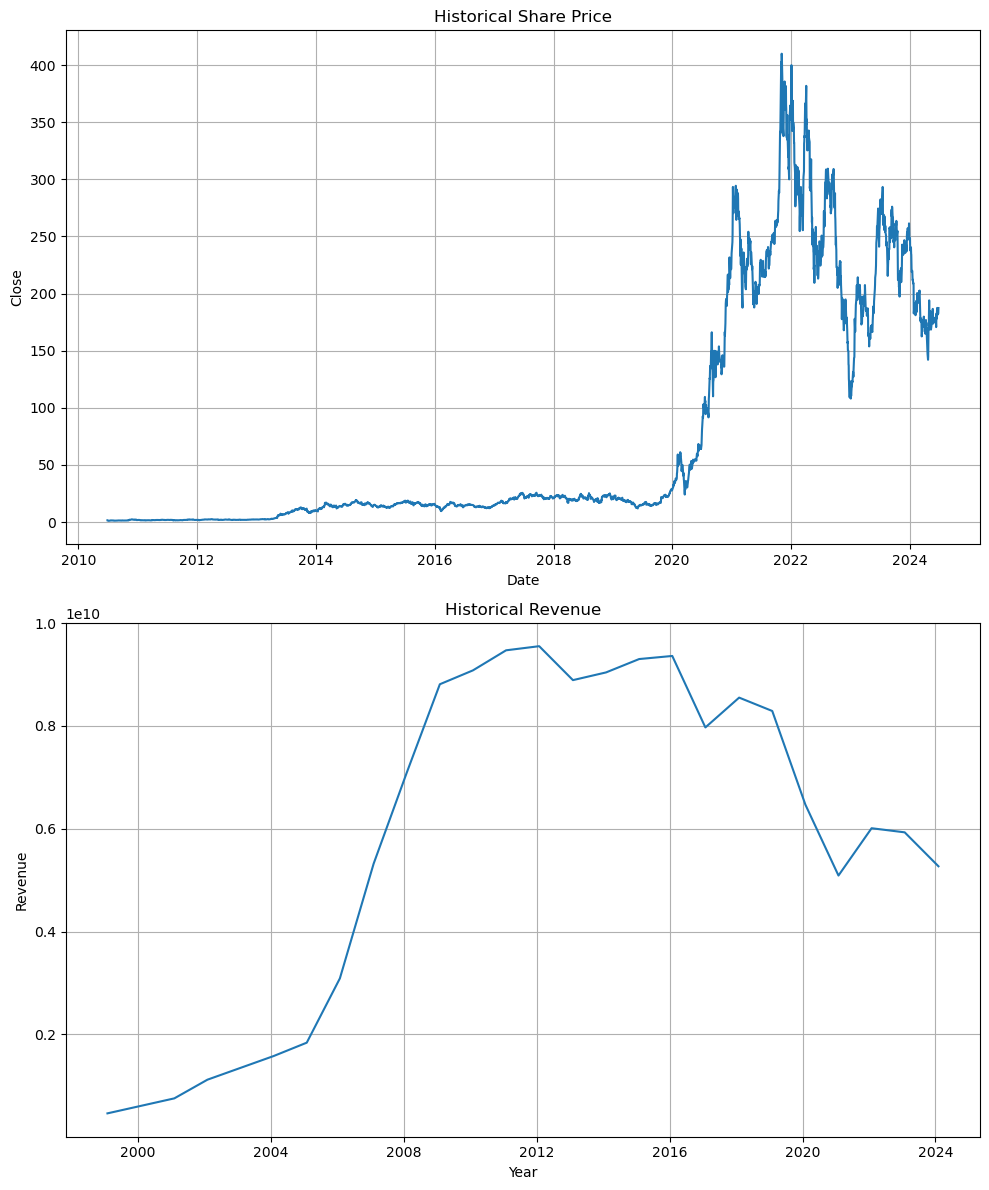

In [158]:
fig , ax = plt.subplots(2,1,figsize=(10,12)) # 2 rows 1 column plot

make_graph(ax[0] , tesla_data , "Date" , "Close" , "Historical Share Price" , x_label = "Date" , y_label = "Close")

make_graph(ax[1] , tesla_revenue , "Year" , "Revenue" , "Historical Revenue" , x_label = "Year" , y_label = "Revenue")

plt.tight_layout()
plt.show()

### QUESTION 6 : make graph for GameStop Corp

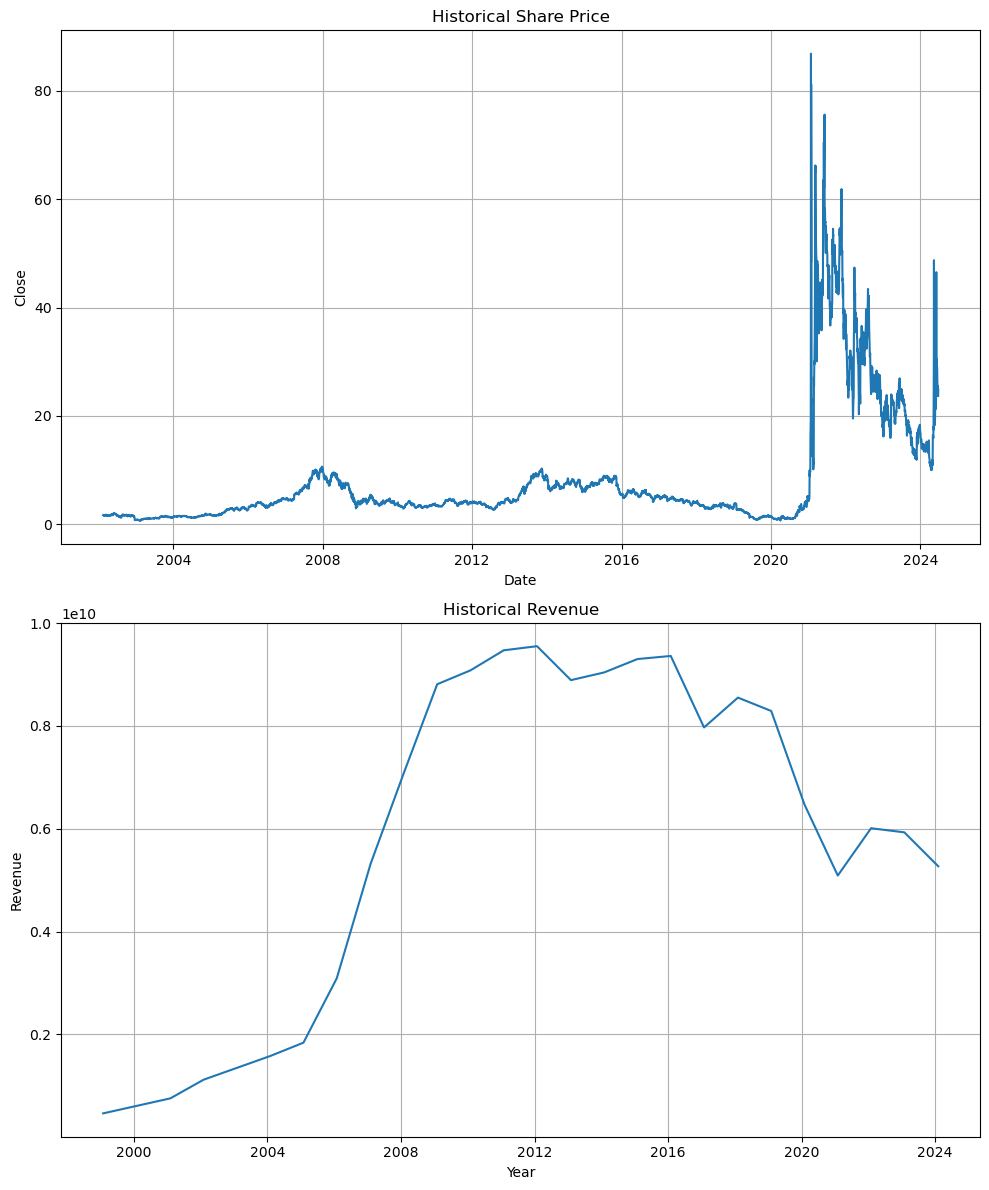

In [159]:
fig , ax = plt.subplots(2,1,figsize=(10,12)) # 2 rows 1 column plot

make_graph(ax[0] , gme_data , "Date" , "Close" , "Historical Share Price" , x_label = "Date" , y_label = "Close")

make_graph(ax[1] , gme_revenue , "Year" , "Revenue" , "Historical Revenue" , x_label = "Year" , y_label = "Revenue")

plt.tight_layout()
plt.show()